# Electric power selling price index In Canada Visualization 

In [97]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings

In [98]:
# Ignore all warnings
warnings.filterwarnings("ignore")

# Your code here

# Reset warning filters to default (optional)
warnings.resetwarnings()
data = pd.read_csv("18100204.csv")
data.head()

,REF_DATE,GEO,DGUID,Index,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1981-01,Canada,2016A000011124,"Electric power selling price indexes, national...","Index, 2014=100",351,units,0,v107792869,1.1,31.0,NaN,NaN,NaN,1
1,1981-01,Canada,2016A000011124,Electric power selling price over 5000kw,"Index, 2014=100",351,units,0,v107792870,1.2,31.1,NaN,NaN,NaN,1
2,1981-01,Canada,2016A000011124,Electric power selling price under 5000kw,"Index, 2014=100",351,units,0,v107792871,1.3,30.8,NaN,NaN,NaN,1
3,1981-01,Atlantic Region,2016A00011,Electric power selling price over 5000kw,"Index, 2014=100",351,units,0,v107792873,2.2,38.2,NaN,NaN,NaN,1
4,1981-01,Atlantic Region,2016A00011,Electric power selling price under 5000kw,"Index, 2014=100",351,units,0,v107792874,2.3,45.2,NaN,NaN,NaN,1


In [99]:
data.drop(['DGUID','UOM','UOM_ID','SCALAR_FACTOR','SCALAR_ID','VECTOR','COORDINATE','STATUS','SYMBOL','TERMINATED','DECIMALS'],axis=1,inplace=True)

In [100]:
Places= data['GEO'].unique()
Places

array(['Canada', 'Atlantic Region', 'Newfoundland and Labrador',
       'Prince Edward Island', 'Nova Scotia', 'New Brunswick', 'Quebec',
       'Ontario', 'Prairie Region', 'Manitoba', 'Saskatchewan', 'Alberta',
       'British Columbia'], dtype=object)

In [101]:
data.head()

,REF_DATE,GEO,Index,VALUE
0,1981-01,Canada,"Electric power selling price indexes, national...",31.0
1,1981-01,Canada,Electric power selling price over 5000kw,31.1
2,1981-01,Canada,Electric power selling price under 5000kw,30.8
3,1981-01,Atlantic Region,Electric power selling price over 5000kw,38.2
4,1981-01,Atlantic Region,Electric power selling price under 5000kw,45.2


In [102]:
data.isnull().sum()

REF_DATE     0
GEO          0
Index        0
VALUE       32
dtype: int64

There is some missing values that we will deal with later <br>
We will also leave some because we cannot make an educated guess on it


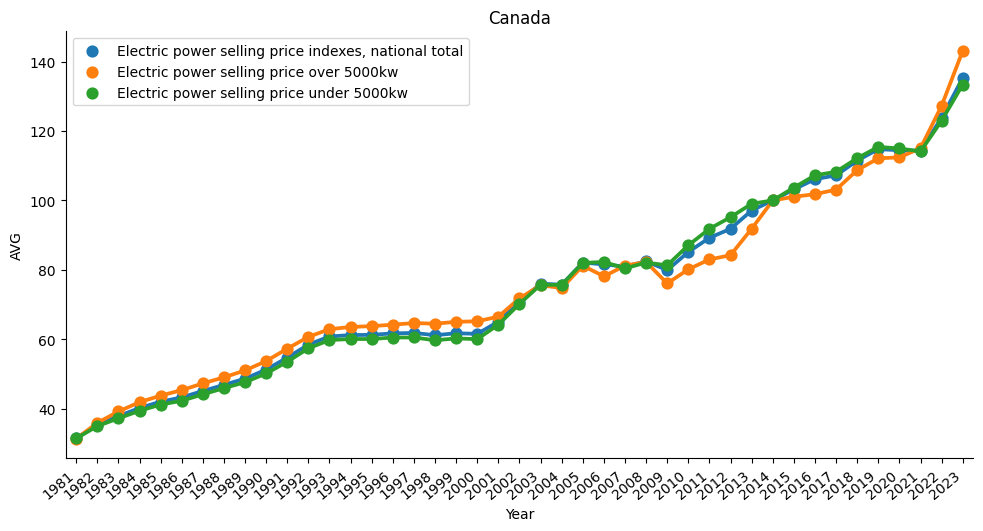

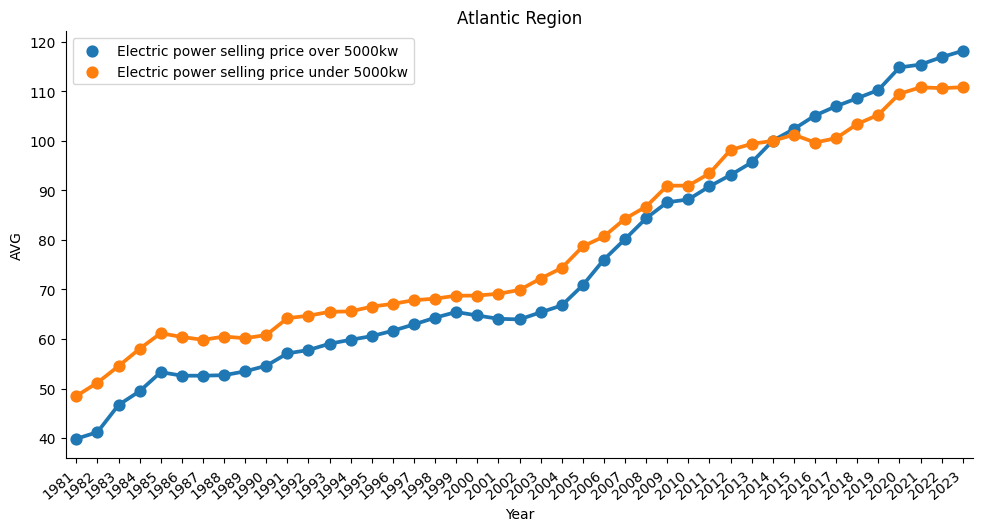

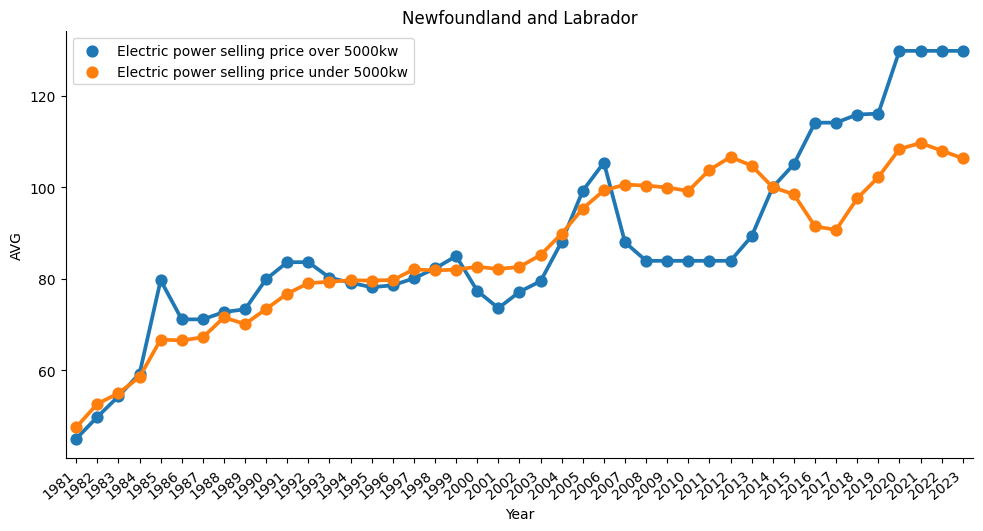

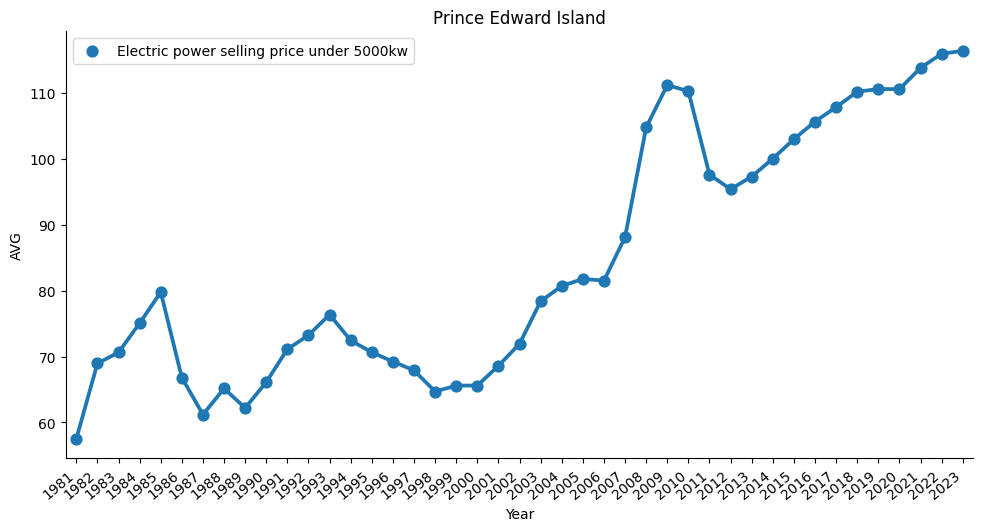

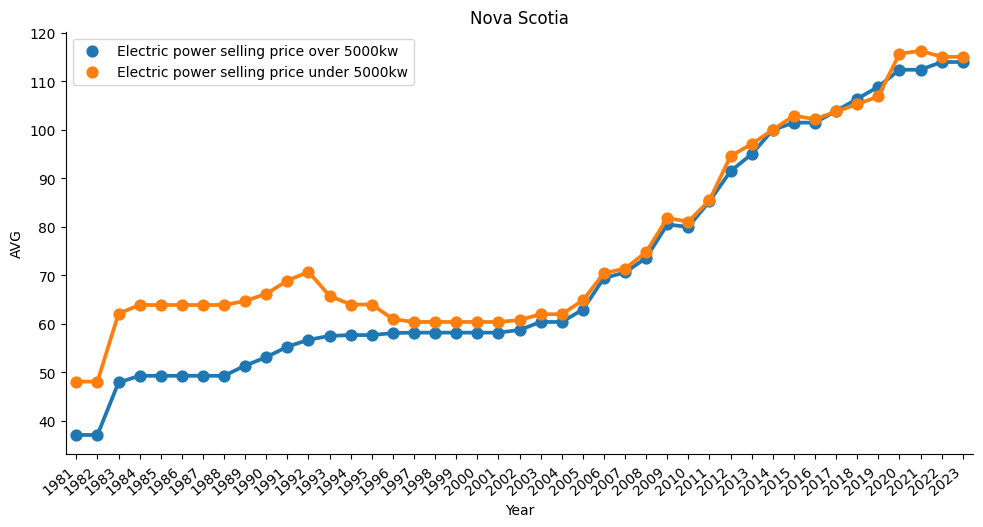

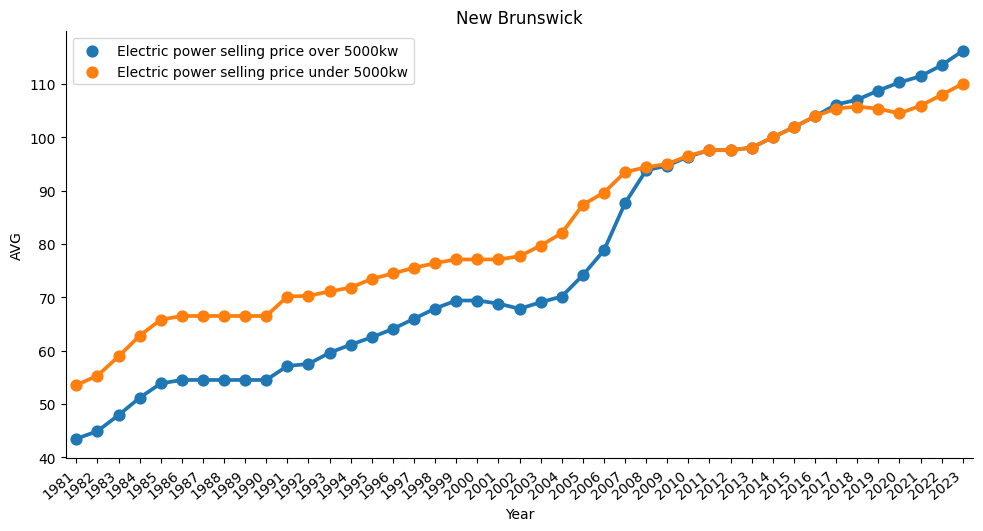

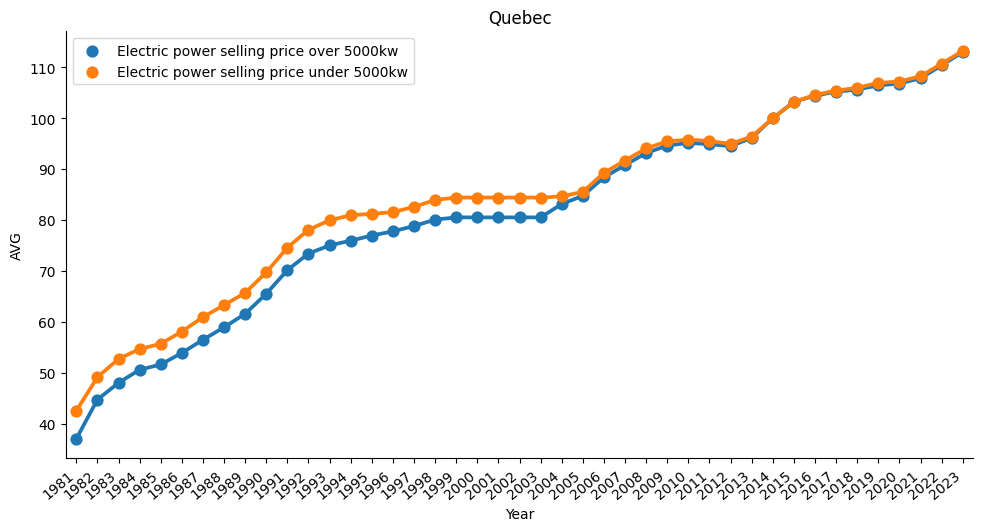

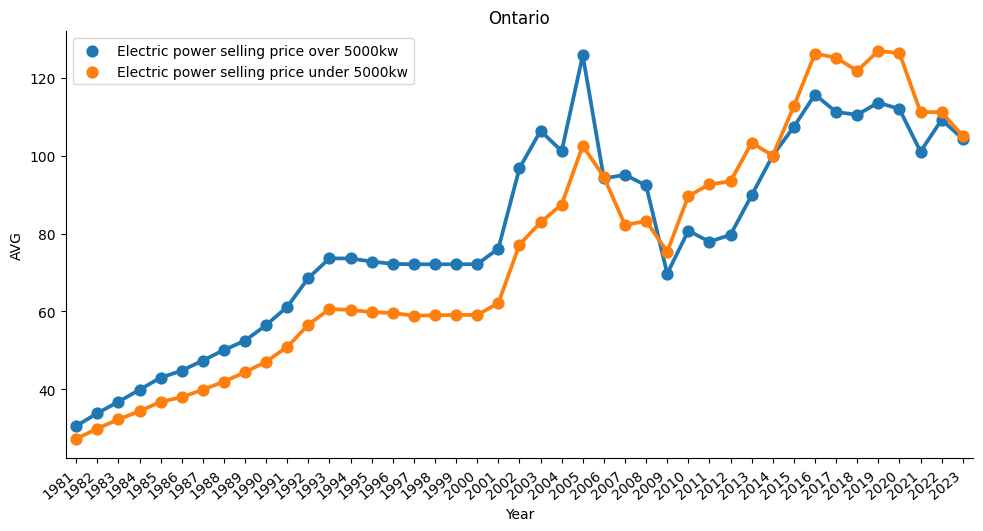

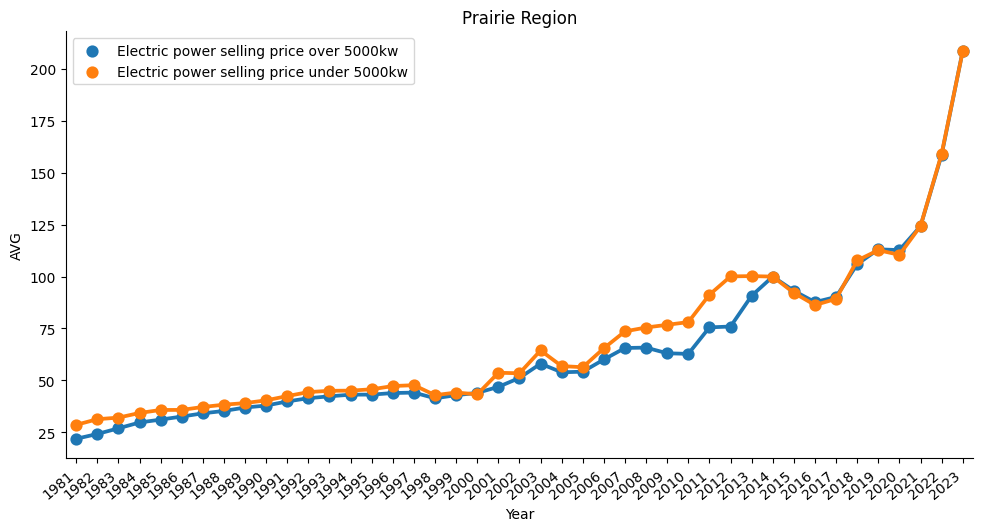

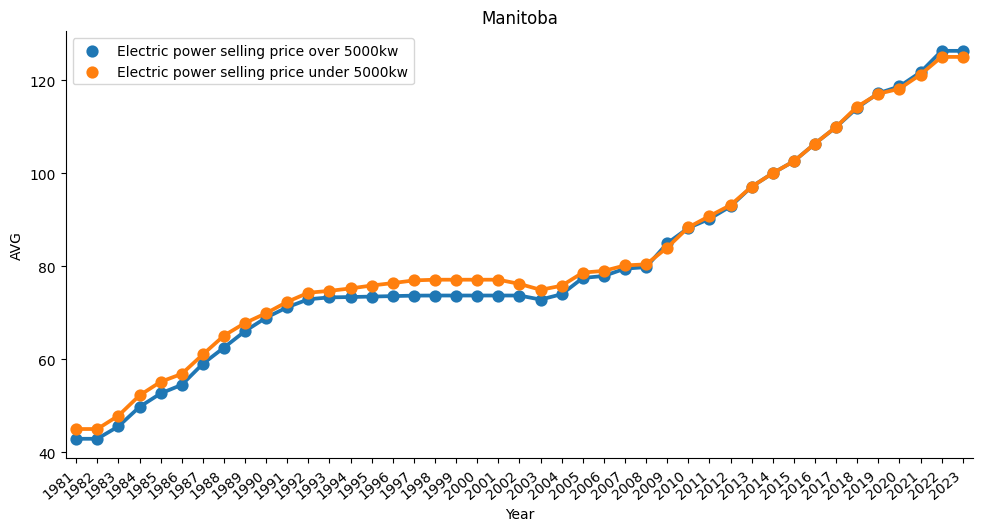

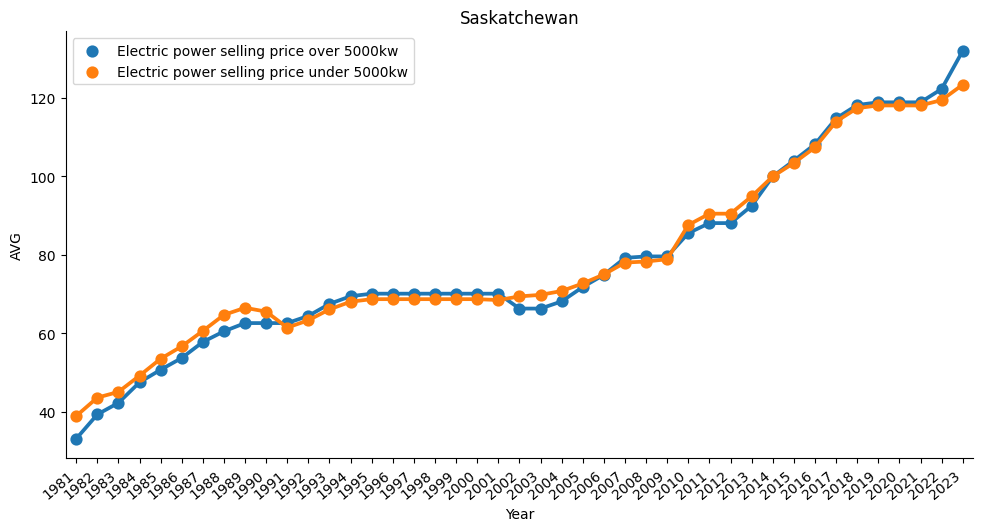

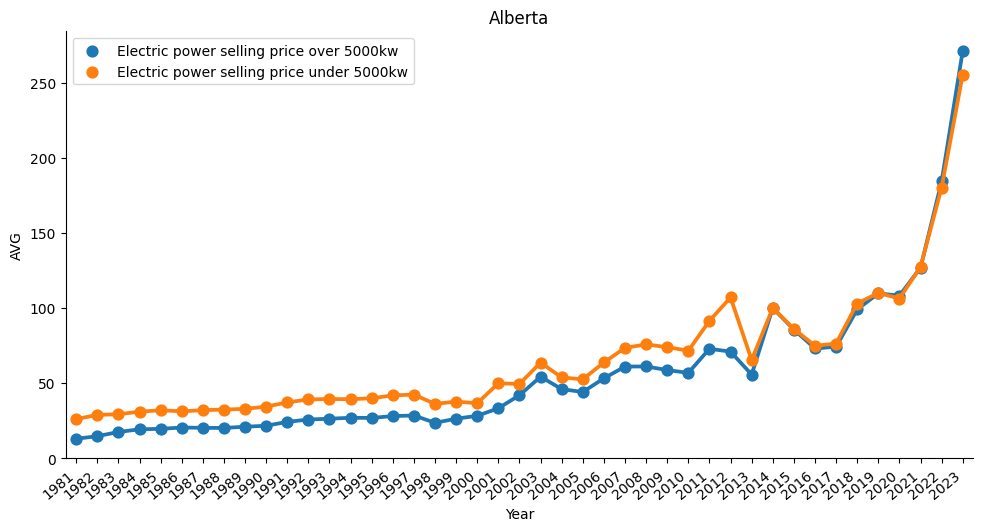

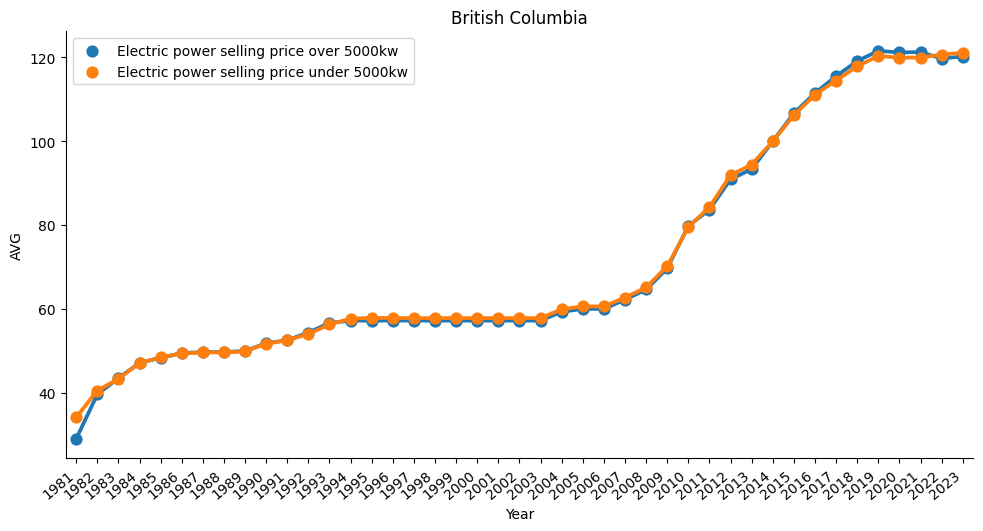

In [104]:
#data.reset_index(inplace=True)
warnings.filterwarnings("ignore", category=pd.core.common.SettingWithCopyWarning)
for geo in data['GEO'].unique():
    # Filter the data for the current location
    df = data[data['GEO'] == geo]
    
    # Preprocess the data
    df['REF_DATE'] = pd.to_datetime(df['REF_DATE'])
    df['Year'] = df['REF_DATE'].dt.year
    df['AVG'] = df.groupby(['Year', 'Index'])['VALUE'].transform('mean')
    ByYears = df.groupby(['Year', 'Index'])['AVG'].mean().reset_index()
    
    # Alberta has missing values in 2013
    if geo == 'Alberta':
        average_by_index = ByYears.groupby('Index')['AVG'].mean()
        for index, row in ByYears.iterrows():
            if np.isnan(row['AVG']):
                ByYears.at[index, 'AVG'] = average_by_index[row['Index']]

    # Create the plot
    g = sns.catplot(data=ByYears, x='Year', y='AVG', hue='Index', kind='point', legend=False, height=5, aspect=2)

    # Rotate x-axis labels vertically
    for ax in g.axes.flat:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    # Move the legend to the top-left corner
    plt.legend(loc='upper left')
    # Set the title of the plot to the current geographical location
    plt.title(geo)
    
    # Show the plot
    plt.show()

In [105]:
new_data=data[data['GEO']!='Canada']
new_data['REF_DATE'] = pd.to_datetime(new_data['REF_DATE'])
new_data['Year'] = new_data['REF_DATE'].dt.year
new_data['AVG'] = new_data.groupby(['GEO','Year', 'Index'])['VALUE'].transform('mean')
new=new_data.groupby(['GEO','Year','Index'])['AVG'].mean().reset_index()
Table=new[(new['Year']==2023) & (new['Index']=='Electric power selling price under 5000kw')]


In [114]:
newDict = {
    'GEO': ['Atlantic Region', 'Newfoundland and Labrador', 'Prince Edward Island', 'Nova Scotia',
               'New Brunswick', 'Quebec', 'Ontario', 'Prairie Region', 'Manitoba', 'Saskatchewan',
               'Alberta', 'British Columbia'],
    'Latitude': [45.9636, 53.1355, 46.5107, 44.6819, 46.5653, 52.9399, 51.2538, 53.7609, 49.8951, 52.9399, 53.9333, 53.7267],
    'Longitude': [-66.6431, -57.6604, -63.4168, -63.7443, -66.4619, -73.5491, -85.3232, -98.8139, -97.1384, -106.4509, -116.5765, -127.6476]
}
newData= pd.DataFrame(newDict)

In [115]:
merged_data = Table.merge(newData, on='GEO', how='left')
merged_data

,GEO,Year,Index,AVG,Latitude,Longitude
0,Alberta,2023,Electric power selling price over 5000kw,271.200,53.9333,-116.5765
1,Atlantic Region,2023,Electric power selling price over 5000kw,118.150,45.9636,-66.6431
2,British Columbia,2023,Electric power selling price over 5000kw,120.225,53.7267,-127.6476
3,Manitoba,2023,Electric power selling price over 5000kw,126.300,49.8951,-97.1384
4,New Brunswick,2023,Electric power selling price over 5000kw,116.225,46.5653,-66.4619
5,Newfoundland and Labrador,2023,Electric power selling price over 5000kw,129.800,53.1355,-57.6604
6,Nova Scotia,2023,Electric power selling price over 5000kw,114.000,44.6819,-63.7443
7,Ontario,2023,Electric power selling price over 5000kw,104.325,51.2538,-85.3232
8,Prairie Region,2023,Electric power selling price over 5000kw,208.800,53.7609,-98.8139
9,Quebec,2023,Electric power selling price over 5000kw,113.000,52.9399,-73.5491


In [116]:
insert_to = pd.DataFrame()
insert_to['Lat']=merged_data['Latitude']
insert_to['Long']=merged_data['Longitude']
insert_to['AVG']=merged_data['AVG']
insert_to.head(12)



,Lat,Long,AVG
0,53.9333,-116.5765,271.200
1,45.9636,-66.6431,118.150
2,53.7267,-127.6476,120.225
3,49.8951,-97.1384,126.300
4,46.5653,-66.4619,116.225
5,53.1355,-57.6604,129.800
6,44.6819,-63.7443,114.000
7,51.2538,-85.3232,104.325
8,53.7609,-98.8139,208.800
9,52.9399,-73.5491,113.000


### 2023 Electric power selling price under 5000kw for each location



In [117]:
import folium
from folium import plugins
map = folium.Map(location = [69.6205,-96.5000], tiles='Cartodb dark_matter', zoom_start = 3)
plugins.HeatMap(insert_to).add_to(map)
count=0
for i in insert_to['Lat']:
    map.add_child(folium.Marker(location = [i,insert_to['Long'][count]],
                            popup =
                            "Name: " + str(merged_data['GEO'][count]) + '<br>' +
                            "Year: 2023"  + '<br>' +
                            "Average of the year: " + str(insert_to['AVG'][count]) + '<br>')
                            )
    count=count+1
map

In [118]:
Table=new[(new['Year']==2023) & (new['Index']=='Electric power selling price over 5000kw')]
merged_data = Table.merge(newData, on='GEO', how='left')
insert_to = pd.DataFrame()
insert_to['Lat']=merged_data['Latitude']
insert_to['Long']=merged_data['Longitude']
insert_to['AVG']=merged_data['AVG']
insert_to.head(12)
#Prince Edward Island is not available

,Lat,Long,AVG
0,53.9333,-116.5765,271.200
1,45.9636,-66.6431,118.150
2,53.7267,-127.6476,120.225
3,49.8951,-97.1384,126.300
4,46.5653,-66.4619,116.225
5,53.1355,-57.6604,129.800
6,44.6819,-63.7443,114.000
7,51.2538,-85.3232,104.325
8,53.7609,-98.8139,208.800
9,52.9399,-73.5491,113.000


### 2023 Electric power selling price under 5000kw for each location

In [119]:
import folium
from folium import plugins
map = folium.Map(location = [69.6205,-96.5000], tiles='Cartodb dark_matter', zoom_start = 3)
plugins.HeatMap(insert_to).add_to(map)
count=0
counter=0
for i in insert_to['Lat']:
    if merged_data['GEO'][counter] == 'Prince Edward Island':
        counter=counter+1
    map.add_child(folium.Marker(location = [i,insert_to['Long'][count]],
                            popup =
                            "Name: " + str(merged_data['GEO'][counter]) + '<br>' +
                            "Year: 2023"  + '<br>' +
                            "Average of the year: " + str(insert_to['AVG'][count]) + '<br>')
                            )
    count=count+1
    counter=counter+1
map